# Project 1

The presentation for this project can be viewed at https://prezi.com/view/3azWTGdmnX6uAtsadWRS/

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import seaborn as sns
act = pd.read_csv('../data/act.csv')
sat = pd.read_csv('../data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [2]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [3]:
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

In [4]:
act.columns

Index(['Unnamed: 0', 'State', 'Participation', 'English', 'Math', 'Reading',
       'Science', 'Composite'],
      dtype='object')

In [5]:
sat.columns

Index(['Unnamed: 0', 'State', 'Participation',
       'Evidence-Based Reading and Writing', 'Math', 'Total'],
      dtype='object')

The data from ACT contains columns that are described as:
'Unnamed: 0' appears to be a column index 
'State' is the U.S. State in which the data corresonds to 
'Participation' is the % of students who participated in the test
'English', 'Math', 'Reading', 'Science', 'Composite' are average scores in the corresponding categories

The data from SAT contains columns that are described as:
'Unnamed: 0' appears to be a column index 
'State' is the U.S. State in which the data corresonds to 
'Participation' is the % of students who participated in the test
'Evidence-Based Reading and Writing', 'Math', 'Total' are average scores in the corresponding categories

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete to me, but I see two issues.
1) Participation values are a percentage and include the % character, forcing the data type to be an object. these values need to be converted to a data type that we can calculate statistics on
2)The ACT has an extra entry for national scores. This should either be excluded or the entry should be added to the SAT scores.

In [6]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


In [7]:
act.describe()

,Unnamed: 0,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,25.500000,20.919231,21.173077,22.001923,21.040385,21.509615
std,15.154757,2.332132,1.963602,2.048672,3.151113,2.002083
min,0.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,12.750000,19.000000,19.400000,20.475000,19.900000,19.800000
50%,25.500000,20.550000,20.900000,21.700000,21.150000,21.400000
75%,38.250000,23.300000,23.100000,24.125000,22.525000,23.600000
max,51.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [8]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [9]:
sat.describe()

,Unnamed: 0,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,25.000000,569.117647,547.627451,1126.098039
std,14.866069,45.666901,84.909119,92.494812
min,0.000000,482.000000,52.000000,950.000000
25%,12.500000,533.500000,522.000000,1055.500000
50%,25.000000,559.000000,548.000000,1107.000000
75%,37.500000,613.000000,599.000000,1212.000000
max,50.000000,644.000000,651.000000,1295.000000


The low on Math is lower than the lowest possible score. 
Upon further inspection, the offending state giving us bad data is Maryland. 
From Brian Osgood: 

### * Maryland SAT Math score was actually 524, not 52 as per https://reports.collegeboard.org/pdf/2017-maryland-sat-suite-assessments-annual-report.pdf
### * Maryland ACT Science score was actually 23.2 not 2.3 as per https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

In [10]:
sat.at[20,'Math']=524
sat.at[20,'Math']


524

In [11]:
act.at[21,'Science']=23.2
act.at[21,'Science']

23.2

##### 5. Print the types of each column.

In [12]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [13]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [14]:
act['Participation']=act['Participation'].map(lambda x: float(x.replace('%','')))

In [15]:
sat['Participation']=sat['Participation'].map(lambda x: float(x.replace('%','')))


In [16]:
sat=sat.loc[:,'State':]
act=act.loc[:,'State':]

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [17]:
sat.index

RangeIndex(start=0, stop=51, step=1)

In [18]:
act.loc[:,'Participation':].columns

Index(['Participation', 'English', 'Math', 'Reading', 'Science', 'Composite'], dtype='object')

In [19]:
sat_participation=dict(zip(sat['State'],sat[sat.loc[:,'Participation':].columns[0]]))
sat_read_write=dict(zip(sat['State'],sat[sat.loc[:,'Participation':].columns[1]]))
sat_math=dict(zip(sat['State'],sat[sat.loc[:,'Participation':].columns[2]]))
sat_total=dict(zip(sat['State'],sat[sat.loc[:,'Participation':].columns[3]]))

act_participation=dict(zip(act['State'],act[act.loc[:,'Participation':].columns[0]]))
act_english=dict(zip(act['State'],act[act.loc[:,'Participation':].columns[1]]))
act_math=dict(zip(act['State'],act[act.loc[:,'Participation':].columns[2]]))
act_reading=dict(zip(act['State'],act[act.loc[:,'Participation':].columns[3]]))
act_science=dict(zip(act['State'],act[act.loc[:,'Participation':].columns[4]]))
act_composite=dict(zip(act['State'],act[act.loc[:,'Participation':].columns[5]]))





##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [20]:
act_dict={}
act_dict.clear
for col in act.columns:
    act_dict.update({col:act[col]})

sat_dict={}
sat_dict.clear
for col in sat.columns:
    sat_dict.update({col:sat[col]})

##### 9. Merge the dataframes on the state column.

In [21]:
#act=act.loc[1:,:]

In [91]:
act_sat=pd.merge(act,sat,on='State')
act_sat.head()

,State,Participation_x,English,Math_x,Reading,Science,Composite,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [92]:
act_sat=pd.merge(act,sat,on='State',suffixes=('act','sat'))
act_sat.head()

,State,Participationact,English,Mathact,Reading,Science,Composite,Participationsat,Evidence-Based Reading and Writing,Mathsat,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [24]:
act_sat.columns
for i,col in enumerate(act_sat.columns):
    if i != 0:
        print("The max {} is {}".format(col,act_sat[col].max()))


The max Participationact is 100.0
The max English is 25.5
The max Mathact is 25.3
The max Reading is 26.0
The max Science is 24.9
The max Composite is 25.5
The max Participationsat is 100.0
The max Evidence-Based Reading and Writing is 644
The max Mathsat is 651
The max Total is 1295


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [25]:
sd=[act_sat[x].std() for x in act_sat if x!='State']
sd.insert(0,'sd')
sd

['sd',
 32.14084201588683,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 1.7393530462812443,
 2.020694891154341,
 35.276632270013046,
 45.66690138768932,
 47.12139516560329,
 92.49481172519046]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [26]:
import numpy as np
np.transpose(sd)

array(['sd', '32.14084201588683', '2.35367713980303',
       '1.9819894936505533', '2.0672706264873146', '1.7393530462812443',
       '2.020694891154341', '35.276632270013046', '45.66690138768932',
       '47.12139516560329', '92.49481172519046'], dtype='<U18')

In [27]:
sd_df=pd.DataFrame(np.transpose(sd),index=act_sat.columns).T
sd_df

,State,Participationact,English,Mathact,Reading,Science,Composite,Participationsat,Evidence-Based Reading and Writing,Mathsat,Total
0,sd,32.14084201588683,2.35367713980303,1.9819894936505533,2.0672706264873146,1.7393530462812443,2.020694891154341,35.276632270013046,45.66690138768932,47.12139516560329,92.49481172519046


In [28]:
act_sat_sd=pd.merge(left=sd_df,right=act_sat,how='outer')

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [29]:
act_sat.sort_values('Participationact')

,State,Participationact,English,Mathact,Reading,Science,Composite,Participationsat,Evidence-Based Reading and Writing,Mathsat,Total
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513,499,1012
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532,520,1052
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539,524,1062
38,Pennsylvania,23.0,23.4,23.4,24.2,23.3,23.7,65.0,540,531,1071
20,Maryland,28.0,23.3,23.1,24.2,23.2,23.6,69.0,536,524,1060
45,Vermont,29.0,23.3,23.1,24.4,23.2,23.6,60.0,562,551,1114
21,Massachusetts,29.0,25.4,25.3,25.9,24.7,25.4,76.0,555,551,1107
22,Michigan,29.0,24.1,23.7,24.5,23.8,24.1,100.0,509,495,1005
46,Virginia,29.0,23.5,23.3,24.6,23.5,23.8,65.0,561,541,1102


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [30]:
mask=act_sat["Participationact"]>50
display(act_sat[mask])

,State,Participationact,English,Mathact,Reading,Science,Composite,Participationsat,Evidence-Based Reading and Writing,Mathsat,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,1201
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017
10,Georgia,55.0,21.0,20.9,22.0,21.3,21.4,61.0,535,515,1050
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,55.0,544,541,1085
13,Illinois,93.0,21.0,21.2,21.6,21.3,21.4,9.0,559,556,1115
15,Iowa,67.0,21.2,21.3,22.6,22.1,21.9,2.0,641,635,1275


In [82]:
act.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,65.153846,20.919231,21.173077,22.001923,21.442308,21.509615
std,31.832518,2.332132,1.963602,2.048672,1.723351,2.002083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,31.000000,19.000000,19.400000,20.475000,19.975000,19.800000
50%,68.000000,20.550000,20.900000,21.700000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.125000,23.200000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [84]:
sat.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039
std,35.276632,45.666901,47.121395,92.494812
min,2.000000,482.000000,468.000000,950.000000
25%,4.000000,533.500000,523.500000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [52]:
#Normalize ACT scores
act_sat_norm=act_sat.copy()
act_sat_norm.loc[:,'English':'Composite']  =(
    act_sat_norm.loc[:,'English':'Composite']/36
                                            )
#Normalize SAT individual scores
act_sat_norm.loc[:,'Evidence-Based Reading and Writing':'Mathsat']=(
    (act_sat_norm.loc[:,'Evidence-Based Reading and Writing':'Mathsat']-200)/600
                                                                    )
#Normalize SAT total scores
act_sat_norm.loc[:,'Total']=(
    (act_sat_norm.loc[:,'Total']-400)/1200
                            )
#Remove Participation and States
act_sat_norm.drop(['State','Participationact','Participationsat'],axis=1,inplace=True)

act_sat_norm.head()

,English,Mathact,Reading,Science,Composite,Evidence-Based Reading and Writing,Mathsat,Total
0,0.525000,0.511111,0.547222,0.538889,0.533333,0.655000,0.620000,0.637500
1,0.519444,0.550000,0.566667,0.552778,0.550000,0.578333,0.555000,0.566667
2,0.516667,0.550000,0.558333,0.550000,0.547222,0.605000,0.588333,0.596667
3,0.525000,0.527778,0.547222,0.541667,0.538889,0.690000,0.656667,0.673333
4,0.625000,0.630556,0.641667,0.616667,0.633333,0.551667,0.540000,0.545833


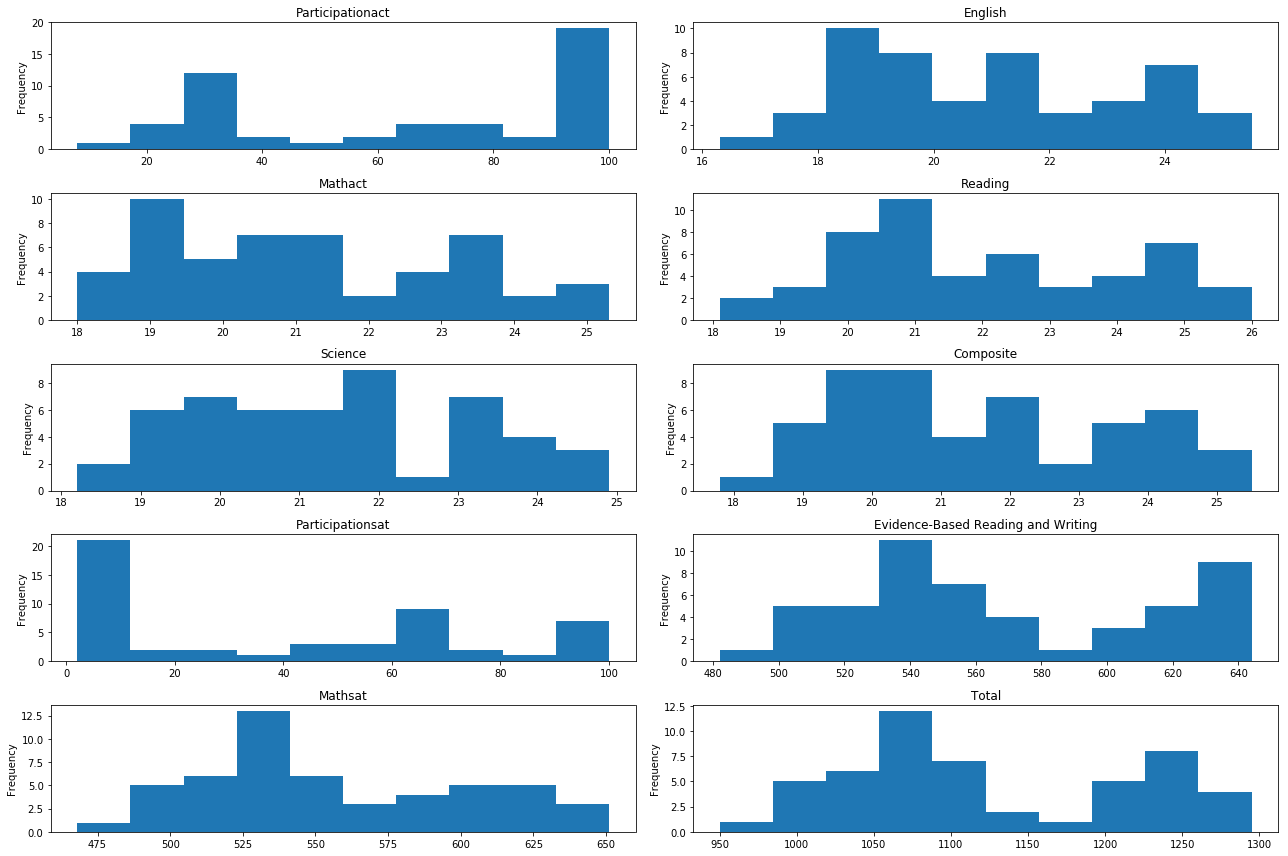

In [77]:
cols = act_sat.columns[1:]
nrows=5
ncols=2
figure, ax = plt.subplots(nrows, ncols, figsize =(18, 12))


for i,x in enumerate(cols):
    irow=int(i/ncols)
    icol=int(i%ncols)
    ax[irow,icol].set_title(x)
    act_sat[x].plot(kind ='hist', ax = ax[irow, icol])
    
    plt.tight_layout()


(array([ 1.,  4., 12.,  2.,  1.,  2.,  4.,  4.,  2., 19.]),
 array([  8. ,  17.2,  26.4,  35.6,  44.8,  54. ,  63.2,  72.4,  81.6,
         90.8, 100. ]),
 <a list of 10 Patch objects>)

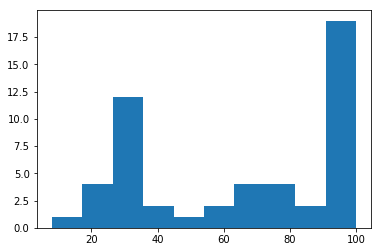

In [33]:
plt.hist(act_sat['Participationact'],bins=10)

(array([21.,  2.,  2.,  1.,  3.,  3.,  9.,  2.,  1.,  7.]),
 array([  2. ,  11.8,  21.6,  31.4,  41.2,  51. ,  60.8,  70.6,  80.4,
         90.2, 100. ]),
 <a list of 10 Patch objects>)

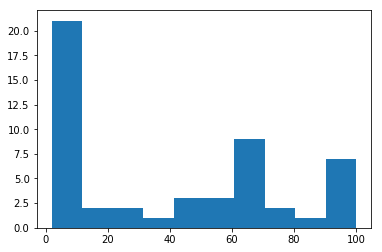

In [34]:
plt.hist(act_sat['Participationsat'],bins=10)

##### 17. Plot the Math(s) distributions from both data sets.

(array([ 1.,  5.,  6., 13.,  6.,  3.,  4.,  5.,  5.,  3.]),
 array([468. , 486.3, 504.6, 522.9, 541.2, 559.5, 577.8, 596.1, 614.4,
        632.7, 651. ]),
 <a list of 10 Patch objects>)

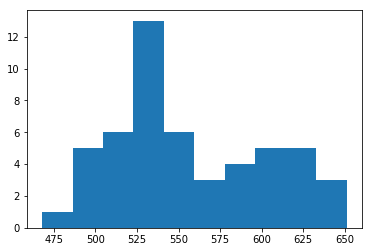

In [35]:
plt.hist(act_sat['Mathsat'],bins=10)

(array([ 4., 10.,  5.,  7.,  7.,  2.,  4.,  7.,  2.,  3.]),
 array([18.  , 18.73, 19.46, 20.19, 20.92, 21.65, 22.38, 23.11, 23.84,
        24.57, 25.3 ]),
 <a list of 10 Patch objects>)

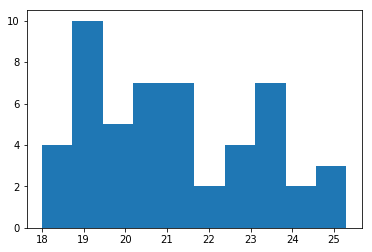

In [36]:
plt.hist(act_sat['Mathact'],bins=10)

##### 18. Plot the Verbal distributions from both data sets.

(array([ 1.,  5.,  5., 11.,  7.,  4.,  1.,  3.,  5.,  9.]),
 array([482. , 498.2, 514.4, 530.6, 546.8, 563. , 579.2, 595.4, 611.6,
        627.8, 644. ]),
 <a list of 10 Patch objects>)

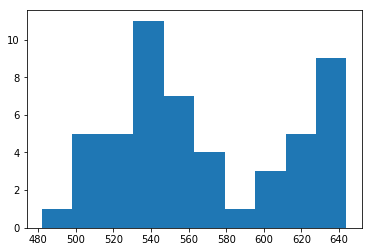

In [37]:
plt.hist(act_sat['Evidence-Based Reading and Writing'])

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

The most common assumption is that the central limit holds true, ie, the average of the samples will be normally distributed

##### 20. Does this assumption hold true for any of our columns? Which?

Null Hypothesis: The scores and participation rates are not normally distributed

In [47]:
from scipy import stats as st
#~ useful variable
cols = act_sat.columns[1:]
normtest=act_sat[cols].apply(st.normaltest)
alpha=.001
#[(x, y<pvalue) for x,y in (normtest) ]
display(normtest.map(lambda x: (alpha>x.pvalue,x.pvalue)))



Participationact                      (True, 1.8018419611696254e-16)
English                                 (False, 0.08434764489205682)
Mathact                                 (False, 0.03786805958606832)
Reading                                 (False, 0.04396683079879635)
Science                                  (False, 0.0638854744336635)
Composite                               (False, 0.03767739587231253)
Participationsat                       (True, 4.028943345766873e-06)
Evidence-Based Reading and Writing        (True, 0.0009986795076584)
Mathsat                                (False, 0.056072998982864684)
Total                                  (False, 0.008200230814088539)
dtype: object

##### 21. Plot some scatterplots examining relationships between all variables.

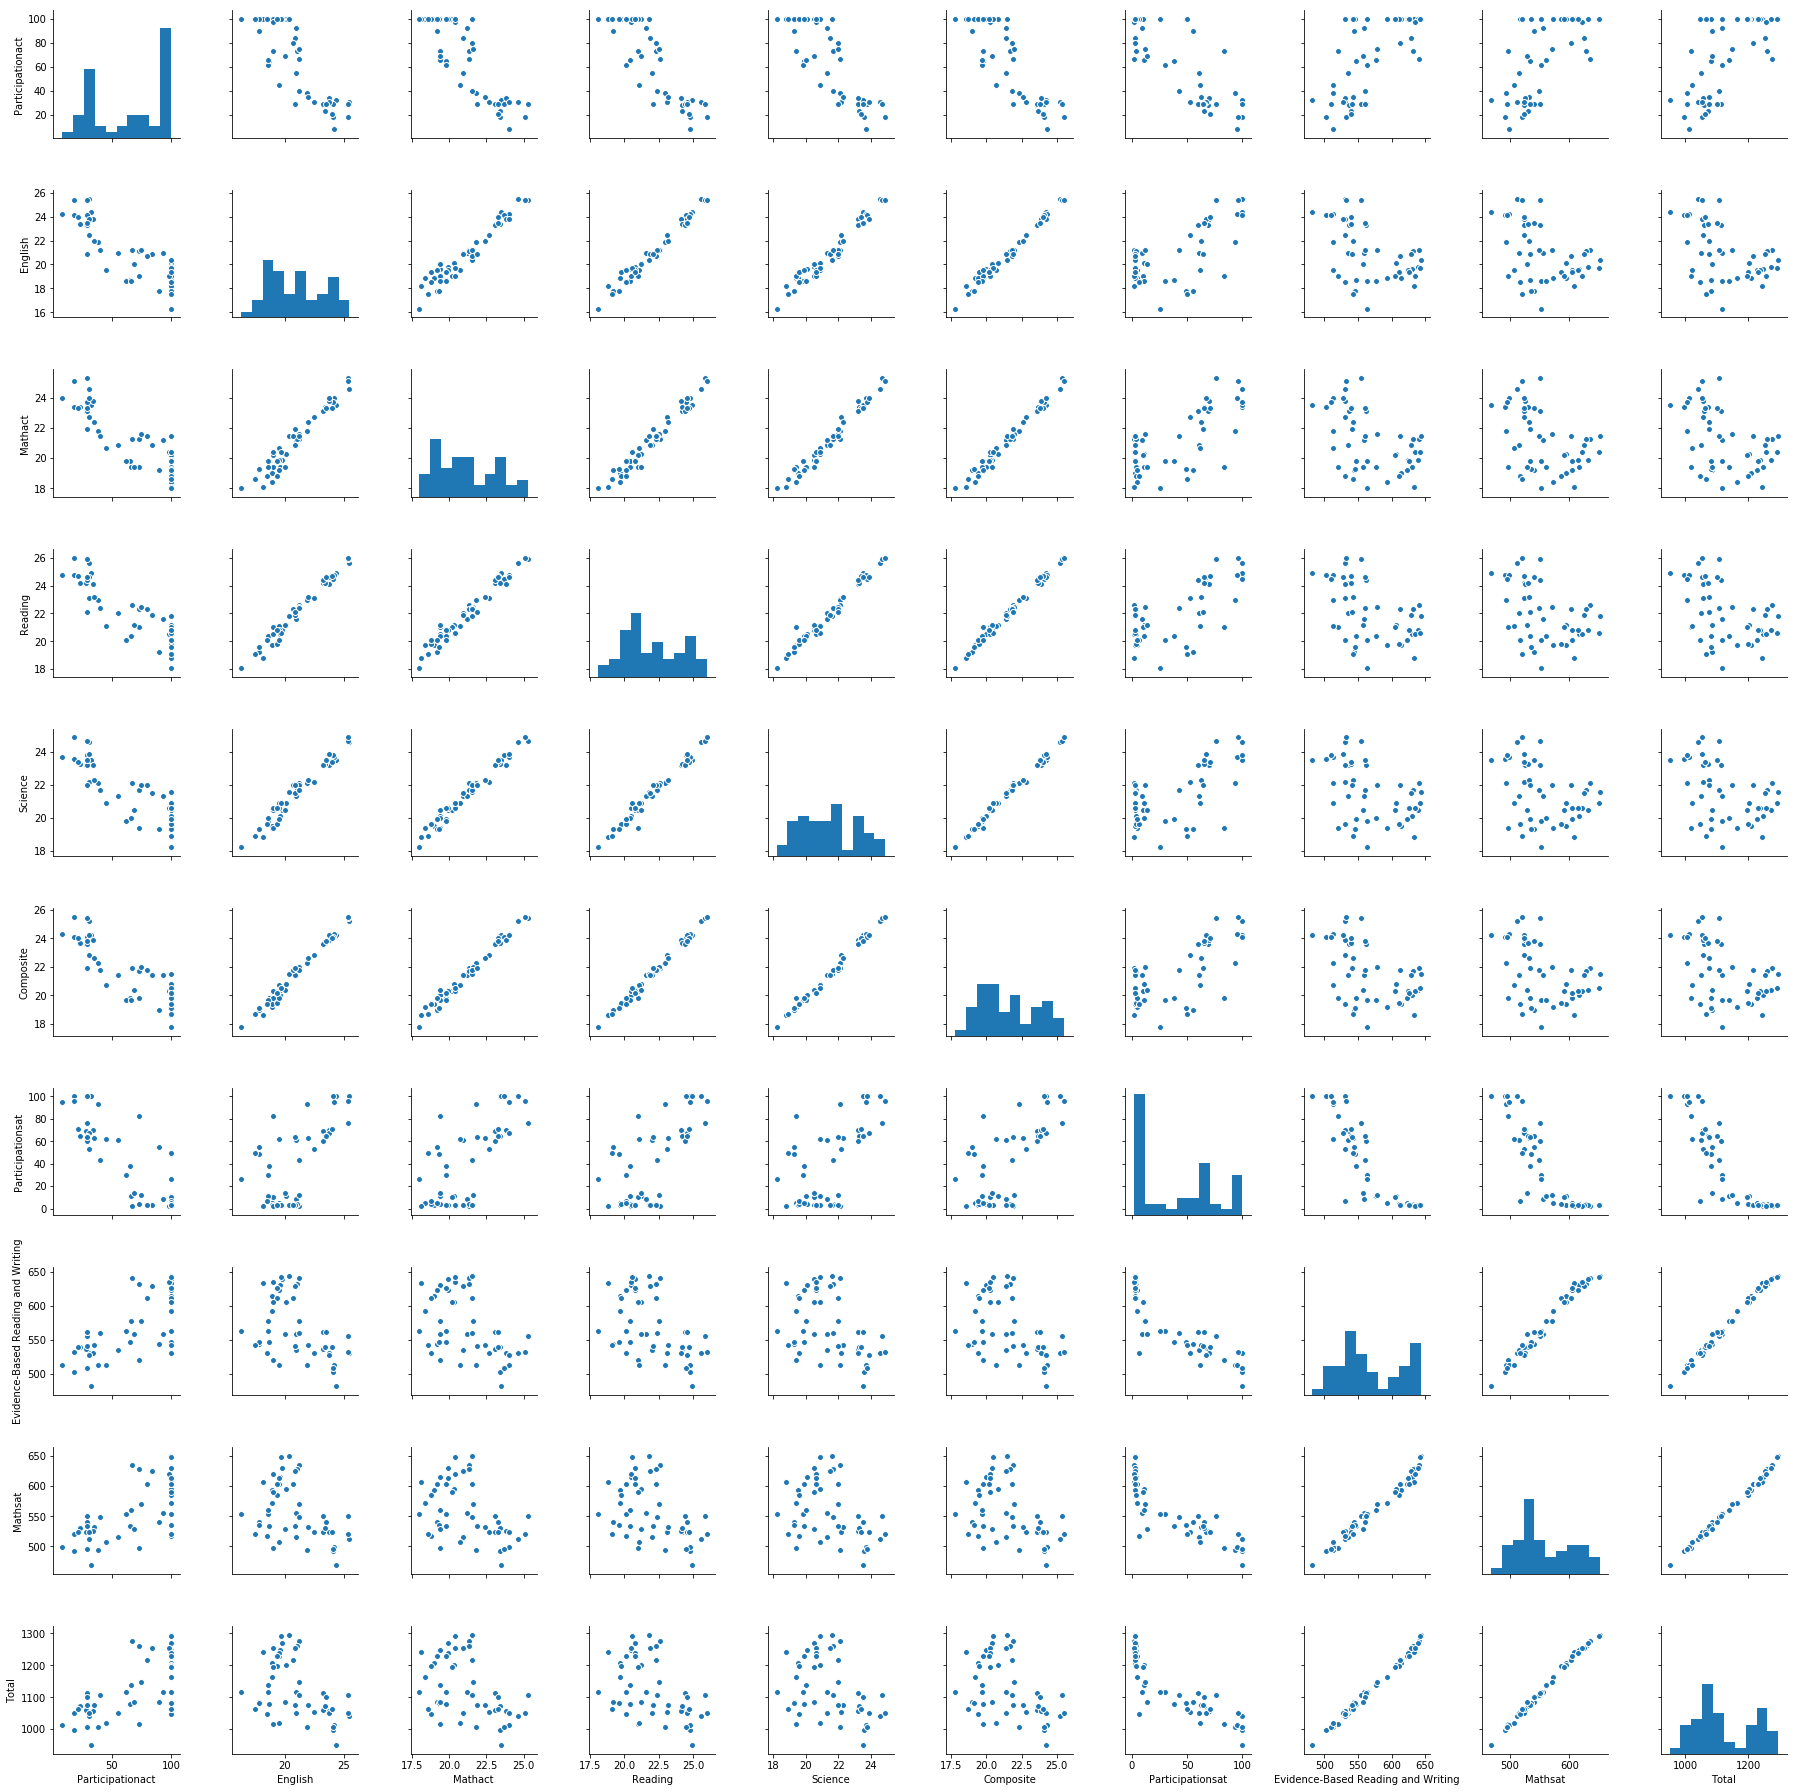

In [85]:
g = sns.pairplot(act_sat)

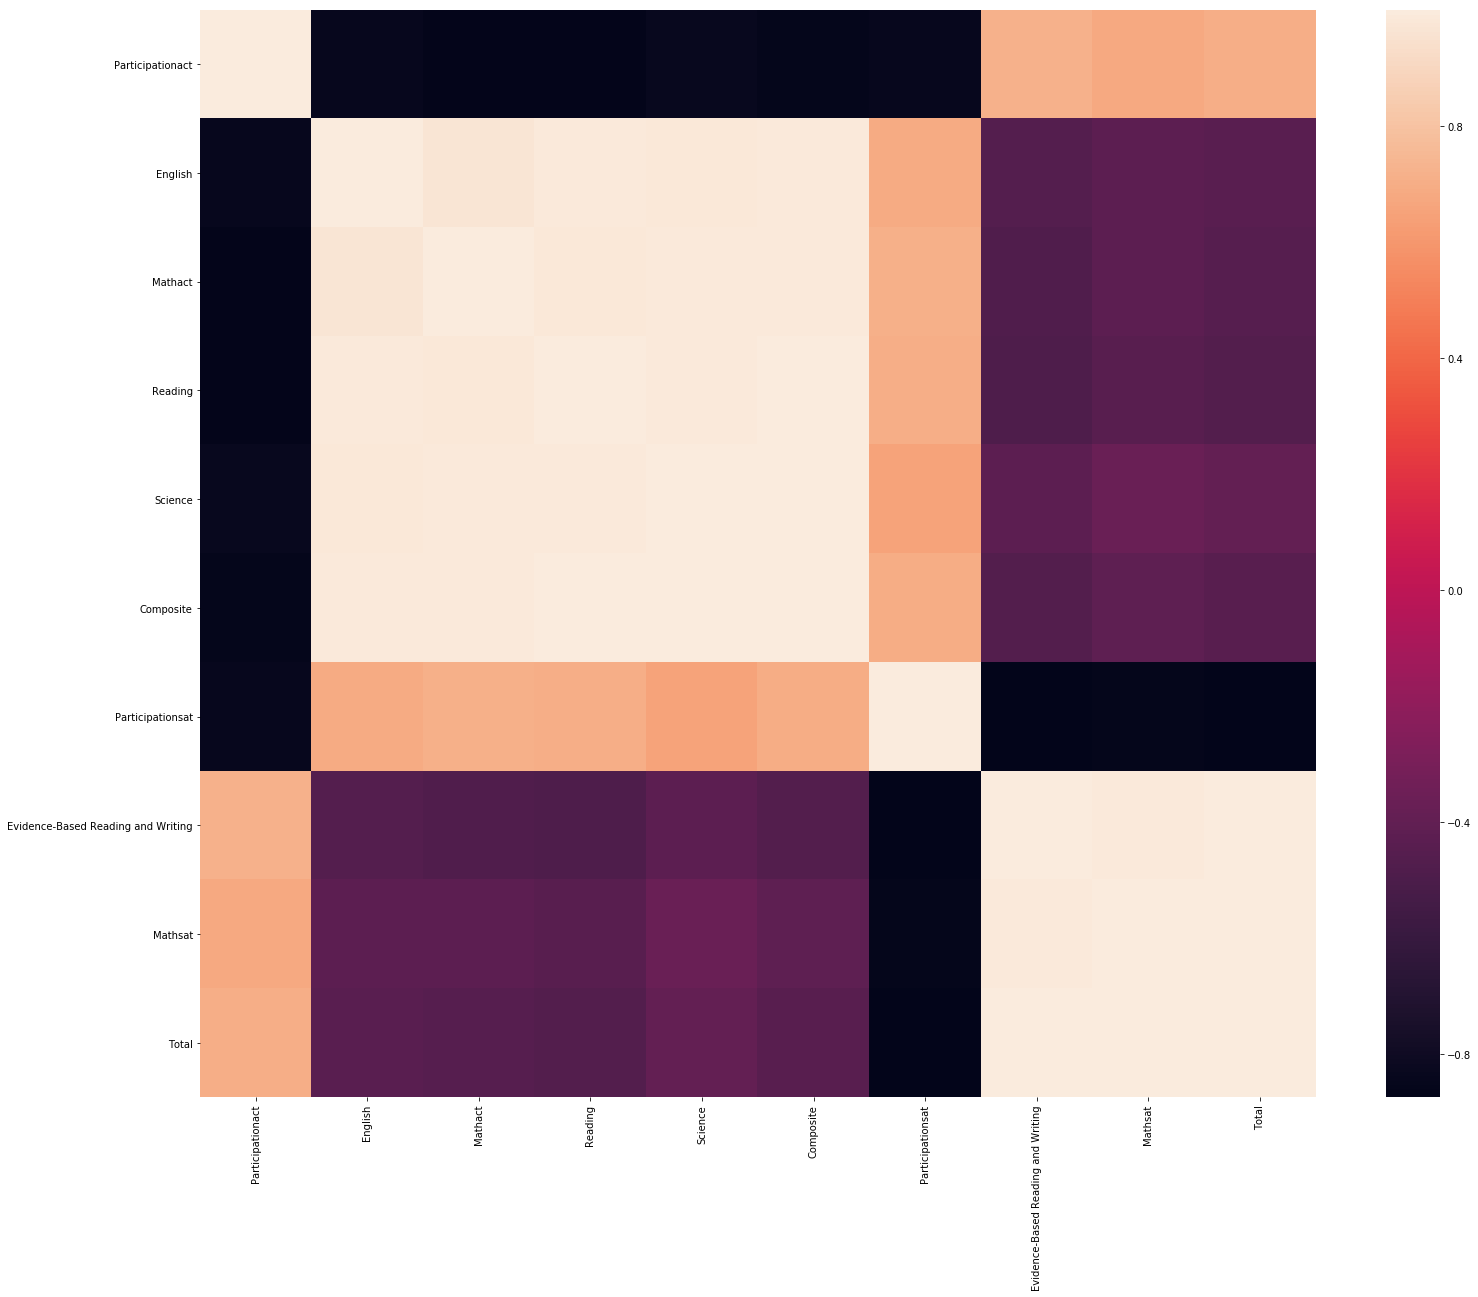

In [90]:
plt.figure(figsize=(25,20))
sns.heatmap((act_sat.corr()))

##### 22. Are there any interesting relationships to note?

Participation on both tests is strongly and negatively correlated 

##### 23. Create box plots for each variable. 

00
01
10
11
20
21
30
31
40
41
10


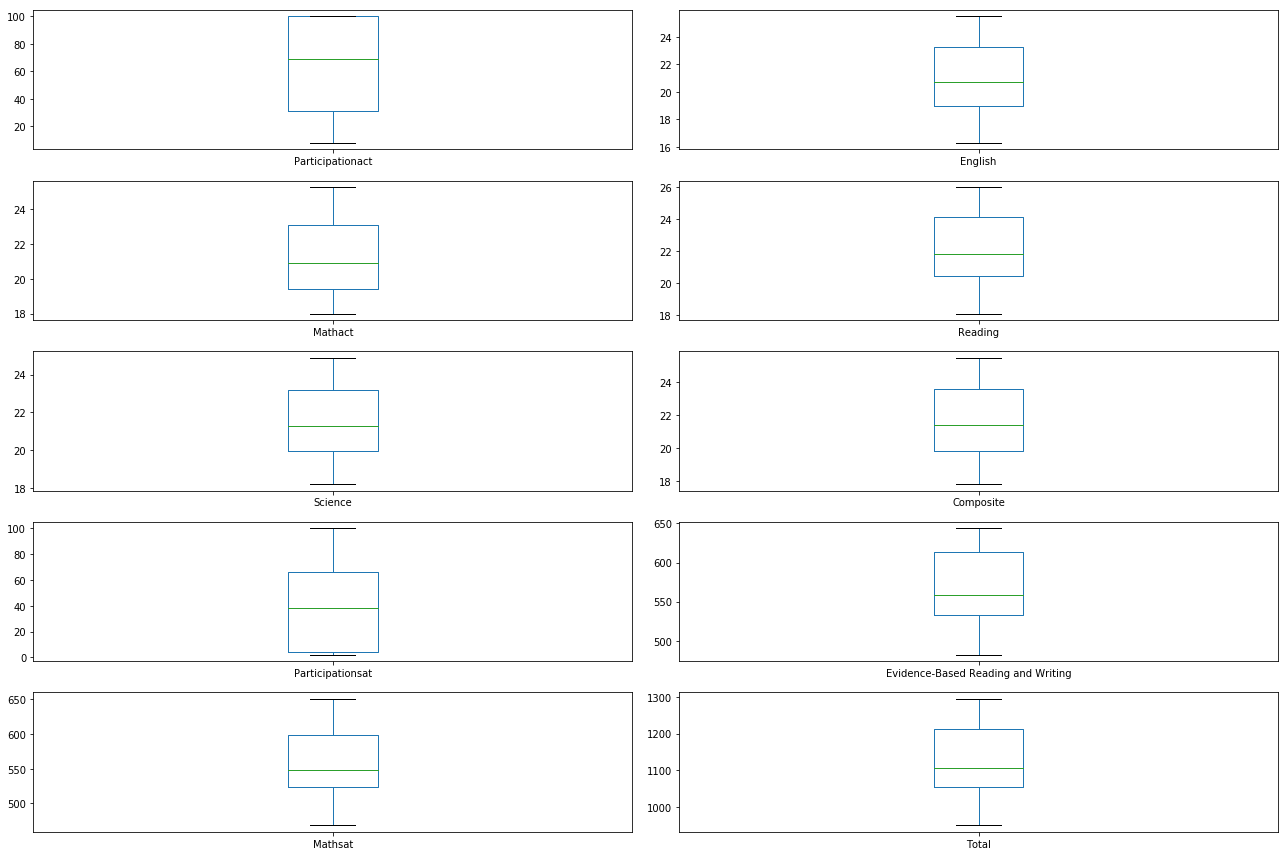

In [40]:
cols = act_sat.columns[1:]
nrows=5
ncols=2
figure, ax = plt.subplots(nrows=5, ncols = 2, figsize =(18, 12))

for i,x in enumerate(cols):
    irow=int(i/ncols)
    icol=int(i%ncols)
    print(str(irow)+str(icol))
    act_sat[x].plot(kind ='box', ax = ax[irow, icol])
'''    
    act_sat['ACT_Math'].plot(kind ='box', ax = ax[0, 0])
    act_sat['ACT_Science'].plot(kind ='box', ax = ax[0, 1])
    act_sat['ACT_Composite'].plot(kind ='box', ax = ax[1, 0])
    act_sat['ACT_English'].plot(kind ='box', ax = ax[1, 1])
    act_sat['ACT_Composite'].plot(kind ='box', ax = ax[2, 0])
    act_sat['SAT_Math'].plot(kind ='box', ax = ax[2, 1])
    act_sat['SAT_EBRW'].plot(kind ='box', ax = ax[3, 0])
    act_sat['SAT_Total'].plot(kind ='box', ax = ax[3, 1])
'''
print (len(cols))
figure.tight_layout()

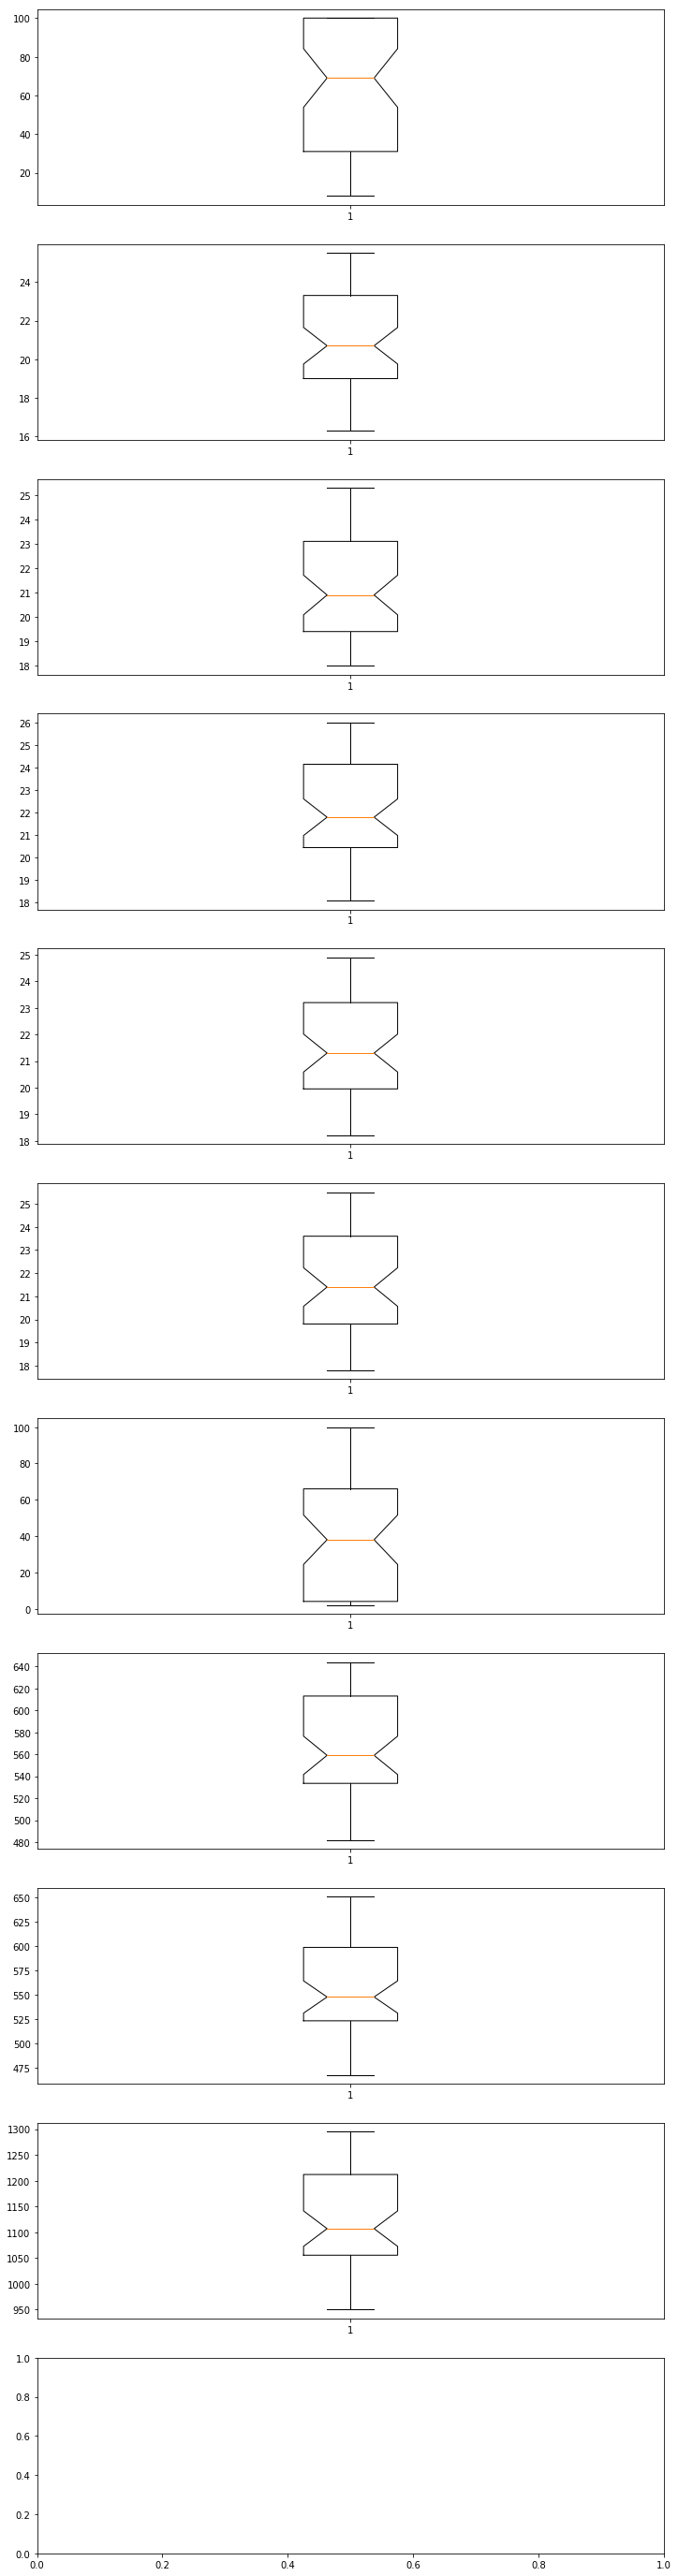

In [41]:
figure, ax = plt.subplots(nrows=11, ncols=1, figsize=(12, 50 ),)
ax=ax.ravel()
for i,x in enumerate(cols):
    
    ax[i].boxplot(act_sat[x],1)
    ax

In [148]:
#~useful variable declaration
participation_compare=pd.concat([
    act_sat[['Participationact']],
    act_sat[['Participationsat']]],
    axis=1)
participation_compare.shape

(51, 2)

In [ ]:
#~useful variable declaration


Text(0,0.5,'Value')

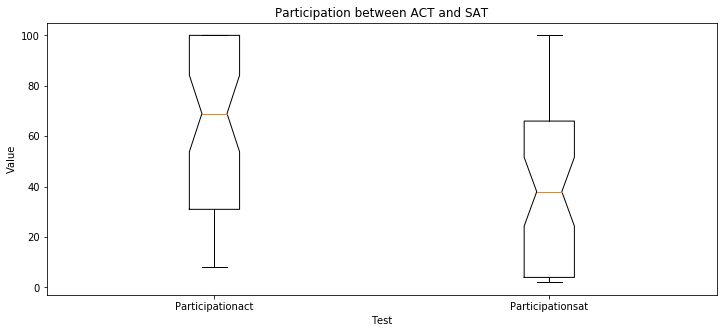

In [43]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5 ),)


plt.boxplot(participation_compare.T,1);
plt.title('Participation between ACT and SAT')
ax.set_xticklabels(participation_compare.columns)
ax.set_xlabel('Test')
ax.set_ylabel('Value')

#plt.title(cols[1])
#plt.boxplot(act_sat[cols[1]],1)

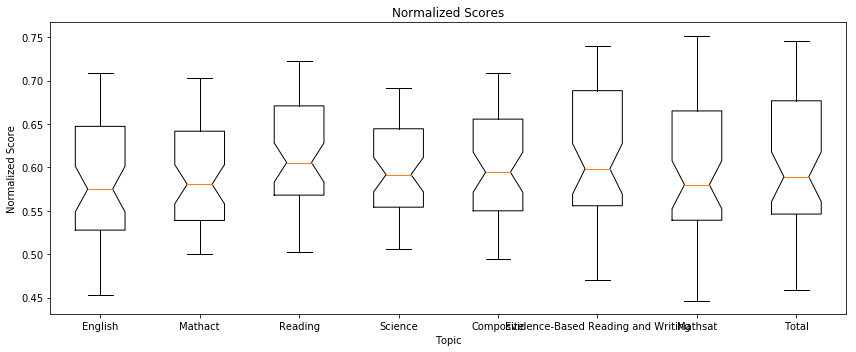

In [78]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5 ),)


plt.boxplot(act_sat_norm.T,1);
plt.title('Normalized Scores')
ax.set_xticklabels(act_sat_norm.columns)
ax.set_xlabel('Topic')
ax.set_ylabel('Normalized Score')
plt.tight_layout()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

Null Hypothesis: The mean difference in participation rates between ACT and SAT is equal to zero

In [130]:
stats.ttest_ind(act_sat.loc[:,'Participationsat'], act_sat.loc[:,'Participationact']).pvalue<0

0.00024134203698662353

There is evidence to reject the null hypothesis, and support the alternative, ie, there is a significant difference in participation rates of the ACT and SAT

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [143]:
participation=sat.loc[:,'Participation']
low,high=st.t.interval(0.95, len(participation)-1, loc=np.mean(participation), scale=st.sem(participation))
print("The true mean is of SAT participation lies between {}% and {}%".format(str(low)[0:5],str(high)[0:5]))


The true mean is of SAT participation lies between 29.88% and 49.72%


In [144]:
participation=act.loc[:,'Participation']
low,high=st.t.interval(0.95, len(participation)-1, loc=np.mean(participation), scale=st.sem(participation))
print("The true mean is of ACT participation lies between {}% and {}%".format(str(low)[0:5],str(high)[0:5]))


The true mean is of ACT participation lies between 56.29% and 74.01%


##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

The range of the confidence intervals are mutually exclusive. this is expected for data that is not correlated.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

Because scores are in the same subject, in the same state, it definitely makes sense to compare scores. 

In [208]:
act_sat['Mathact'].corr(act_sat['Mathsat'])

-0.4204560393193176

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

##### A.

In [189]:
mask= (participation_compare['Participationact'] > 50) & (participation_compare['Participationsat'] > 50)
pd.concat([act.iloc[9:12,:1],participation_compare[mask]],axis=1)


,State,Participationact,Participationsat
9,District of Columbia,73.0,83.0
10,Florida,55.0,61.0
11,Georgia,90.0,55.0


In [201]:
display(act_sat.columns)
act_sat.sort_values(by='Composite').head(10)

Index(['State', 'Participationact', 'English', 'Mathact', 'Reading', 'Science',
       'Composite', 'Participationsat', 'Evidence-Based Reading and Writing',
       'Mathsat', 'Total'],
      dtype='object')

,State,Participationact,English,Mathact,Reading,Science,Composite,Participationsat,Evidence-Based Reading and Writing,Mathsat,Total
28,Nevada,100.0,16.3,18.0,18.1,18.2,17.8,26.0,563,553,1116
24,Mississippi,100.0,18.2,18.1,18.8,18.8,18.6,2.0,634,607,1242
40,South Carolina,100.0,17.5,18.6,19.1,18.9,18.7,50.0,543,521,1064
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,55.0,544,541,1085
33,North Carolina,100.0,17.8,19.3,19.6,19.3,19.1,49.0,546,535,1081


In [209]:
act_sat.describe()

,Participationact,English,Mathact,Reading,Science,Composite,Participationsat,Evidence-Based Reading and Writing,Mathsat,Total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000


In [212]:
act_sat.plot(x=act_satkind='scatter')

ValueError: scatter requires and x and y column

In [216]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = []
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

SyntaxError: invalid syntax (<ipython-input-216-8d17301ed862>, line 9)

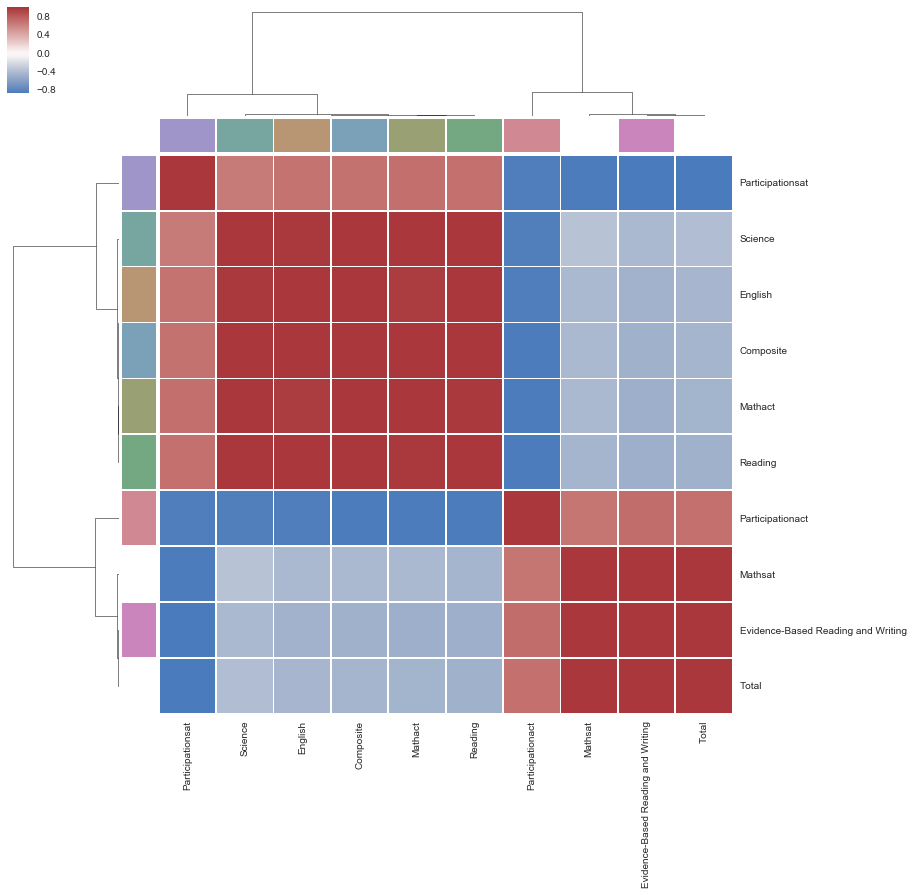

In [261]:
# Load the brain networks example dataset
df = act_sat

# Select a subset of the networks
used_networks = act_sat.columns[1:]
used_columns = df.columns[1:]
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = used_columns
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

In [259]:
#used_networks = 
df = act_sat

# Select a subset of the networks
used_networks = df.columns[1:]
used_columns = df.columns[1:]
used_columns

Index(['Participationact', 'English', 'Mathact', 'Reading', 'Science',
       'Composite', 'Participationsat', 'Evidence-Based Reading and Writing',
       'Mathsat', 'Total'],
      dtype='object')